<a href="https://colab.research.google.com/github/usaidahmed01/Deep-Learning/blob/master/DL27_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
NLP: Natural Language Processing

1. Corpus
  A large collection of text data.
  for example: whatsapp chat (only text). large data warehouse

2. Document
  A single text data from corpus.
  for example: whatsapp specific person chat.

3. Vocabulary
  A Document break down into words
  for example: each word. (unique words)
  'cat sat on mat'
  ['cat' , 'sat' , 'on' , 'mat']

Tokenization:(after all the below steps it will called Bag of Words => Numeric Vectors)
  . Lemmatization
      for example: Simplify words grammatically like "Runs" => "Run" , "Better" => "Good"
  . Stemming
    for example: if like the word is "running" it will be "run", "Studying" into "Studi"
  . Stop Words Removal: Words if we remove them it wont affect our sentences.
  . Remove the Repititions of words.
  . Indexes will be assigned to each word.


SyntaxError: invalid syntax (ipython-input-3909661273.py, line 1)

In [ ]:
# TF - IDF(Term Frequency - Inverse Document Frequency)

#   For example: 'Cat is not Happy' if we remove the stop words in this so it will be like "cat is happy"(sentence meaning changed) so use TF - IDF

#   Words that are frequently used their importance and prioritization will be decreased and if words are rarely appeared then their prioritization will be increased (jou bht rarely aaraha hai uski importance barhjayegi)

Tf = (Number of times term t appears in a document) / (Total number of terms in the document)
IDF = log(Total number of documents / Number of documents with term t in it)


from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'cat sat on the mat',
    'dog chased the cat',
    'cat is happy',
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print('\n' , X.toarray())
# Will get the sparse metrix

['cat' 'chased' 'dog' 'happy' 'is' 'mat' 'on' 'sat' 'the']

 [[0.29803159 0.         0.         0.         0.         0.50461134
  0.50461134 0.50461134 0.38376993]
 [0.34520502 0.5844829  0.5844829  0.         0.         0.
  0.         0.         0.44451431]
 [0.38537163 0.         0.         0.65249088 0.65249088 0.
  0.         0.         0.        ]]


In [1]:
# 2-DEC-2025

from keras.datasets import imdb
(train_data , train_labels) , (test_data , test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
word_index = imdb.get_word_index()
word_index

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [3]:
reversed_word_index = dict([(v , k) for (k , v) in word_index.items()]) # keys into value and values into keys

decoded_review = ' '.join([reversed_word_index.get(i - 3 , '? ') for i in train_data[0]])

In [7]:
# Multi Hot Encoding
  # Converts Sequences into 10000 dimensional vectors (1 if word appears , 0 if not)

import numpy as np

def vectorizesequences(sequences , dimension = 10000):
  results = np.zeros((len(sequences) , dimension))
  for i , sequence in enumerate(sequences):
    for j in sequence:
      results[i , j] = 1
  return results

X_train = vectorizesequences(train_data)
X_test = vectorizesequences(test_data)

train_labels[0]

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
# DEC-4-2025

from tensorflow import keras
from keras import layers
model = keras.Sequential([
    layers.Dense(16 , activation = 'relu') , # Dense means fully connected
    layers.Dense(16 , activation = 'relu') ,
    layers.Dense(1 , activation = 'sigmoid')
])

In [12]:
model.compile(
    optimizer = 'rmsprop', # during training weight ko balance
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [17]:
# Validation Set

#break X_train and Y_train into 10000 and 15000

X_train.shape
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_train.shape
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# data ko mazeed break kardiya taake jab epochs lagayein tou learn tou karega but overfit tou nahi horaha tou thats why ek set se train dooosre se test

In [20]:
history = model.fit(
    partial_x_train ,
    partial_y_train ,
    epochs = 20 ,
    batch_size = 512 , # weight se pehle kitne sample process honge ek time mein
    validation_data = (x_val , y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9991 - loss: 0.0120 - val_accuracy: 0.8677 - val_loss: 0.5687
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9998 - loss: 0.0091 - val_accuracy: 0.8592 - val_loss: 0.6407
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9998 - loss: 0.0094 - val_accuracy: 0.8673 - val_loss: 0.6199
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9976 - loss: 0.0128 - val_accuracy: 0.8678 - val_loss: 0.6342
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9998 - loss: 0.0053 - val_accuracy: 0.8670 - val_loss: 0.6779
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9999 - loss: 0.0055 - val_accuracy: 0.8641 - val_loss: 0.7197
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9997 - loss: 0.0064 - val_accuracy: 0.8517 - val_loss: 0.8183
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.9996 - loss: 0.0059 - val_accuracy: 0.8677 - 

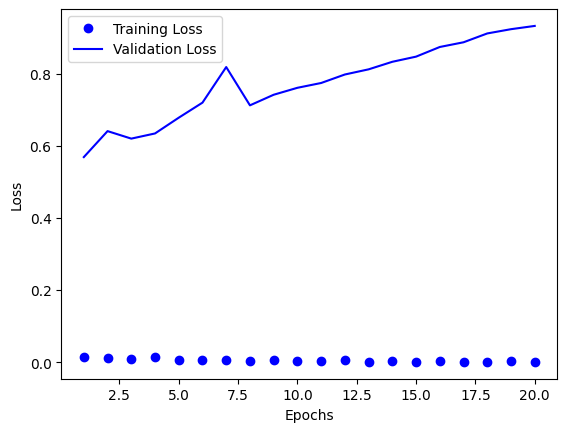

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history

epochs = range(1 , len(history_dict['loss']) + 1 )
plt.plot(epochs , history_dict['loss'] , 'bo' , label = 'Training Loss')
plt.plot(epochs , history_dict['val_loss'] , 'b' , label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()